<a href="https://colab.research.google.com/github/JiSu0708/ESAA-YB/blob/main/0519_%EA%B3%BC%EC%A0%9C(ESAA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**파이썬 머신러닝 완벽가이드** chap5. 04. 303~310p

### 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측


LinearRegression: 선형 모델 중 규제가 적용되지 않은 선형 회귀를 사이킷런에서 구현한 클래스



---

#### LinearRegression 클래스 - Ordinary Least Squares
- 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
- fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장

입력 파라미터
- **fit_intercept**: 불린 값으로 디폴트는 True. intercept(절편) 값을 계산할 것인지 말지를 지정. False로 지정하면 intercept가 사용되지 않고 0으로 지정됨.
- **normalize**: 불린 값으로 디폴트는 False. fit_intercept= False인 경우에는 normalize 파라미터는 무시됨. normalize= True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화함.

---

속성
- **coef_**: fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, Feature 개수).
- **intercept_**: intercept 값

---

Ordinary Least Squares 기반 회귀 계수 계산
- 입력 피처의 독립성에 많은 영향을 받음.
- 피처의 상관관계가 매우 높은 경우 -> 분산이 매우 커져서 -> 오류에 매우 민감해짐. (다중 공선성(multi-collinearity) 문제)
  - 일반적으로 상관관계가 높은 피처가 많은 경우 => 독립적인 중요한 피처만 남기고 제거하거나 규제 적용.
  - 매우 많은 피처가 다중 공선성 문제를 갖고 있다면 => PCA를 통해 차원 축소 수행 

In [8]:
## class sklearn.linear_model.LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)

#### 회귀 평가 지표

- 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심
- 실제값과 예측값의 차이를 그냥 더하면 +/-가 섞여서 오류가 상쇄됨 => 오류의 **절댓값 평균/제곱/제곱한 뒤 다시 루트를 씌운 평균값**을 구함

---

평가지표
- **MAE**:Mean Absolute Error. 실제값과 예측값의 차이 절댓값 -> 평균 
- **MSE**: Mean Squared Error. 실제값과 예측값의 차이 제곱 -> 평균 
- **RMSE**: Root Mean Squared Error. 
- **R^2**: 분산 기반 예측 성능 평가. 실제 값의 분산 대비 예측값의 분산 비율. (예측값 Variance / 실제값 Variance). 1에 가까울수록 예측 정확도가 높다.
- MSLE(Mean Squared Log Error)/RMSLE: MSE/RMSE에 로그 적용

---

각 평가 방법에 대한 사이킷런의 API 및 Scoring 함수 적용 값
- MAE => metrics_mean_absolute_error => 'neg_mean_absolute_error'
- MSE => metrics_mean_squared_error => 'neg_mean_squared_error'
- R^2 => metrics.r2_score => 'r2'

--- 

\* 'neg_': Negative(음수) 값을 가진다는 의미. 

(MAE는 절댓값의 합이기 때문에 음수가 될 수 없지만 Scoring 함수에 'neg_mean_absolute_error'를 써서 음수값을 반환하는 이유 => 사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문)

실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미 

=> 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정 필요.

=> -1을 원래의 평가 지표 값에 곱해서 음수(Negative)를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다.

Scoring 함수의 scoring 파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 -1 \* metrics, mean_absolute_error()이니 주의가 필요. 

---


#### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

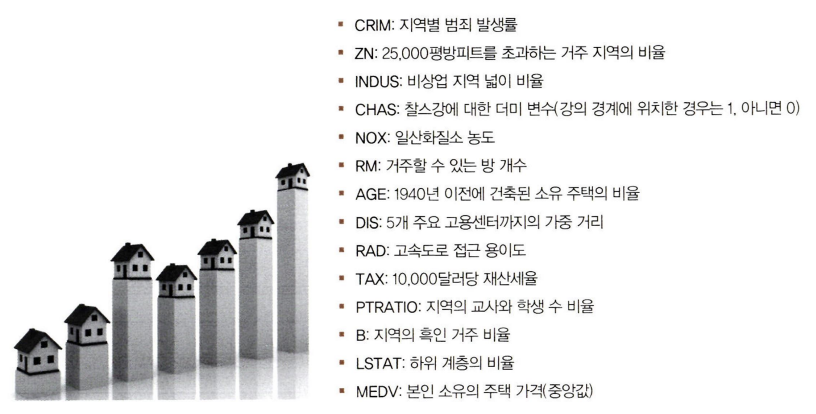


- 해당 데이터 세트 로드 후 DataFrame으로 변경

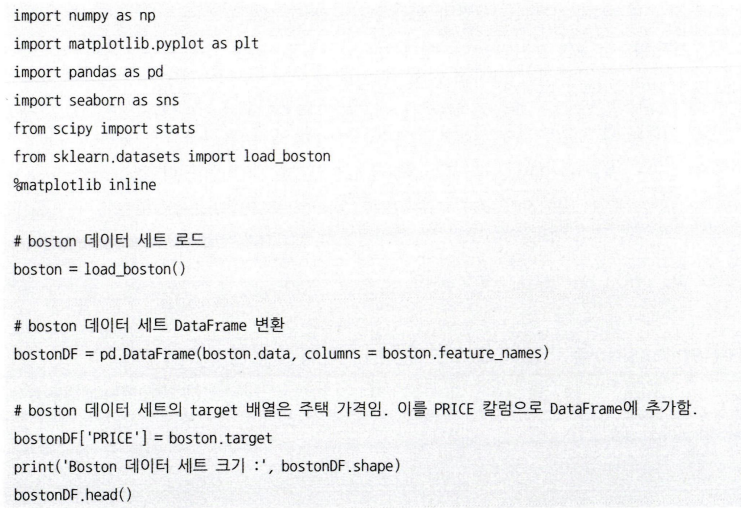

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

# 더 이상  boston dataset을 파이썬에서 지원하지 않음
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
     

feature_names=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()


Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


=> 데이터 세트 피처의 Null 값은 없으며 모두 float 형

- 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화
  - 총 8개의 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인
  - 시본(Seaborn)의 regplot(): X, Y 축의 산점도 + 선형 회귀 직선 그려줌
  - matplotlib.subplots() 이용해 각 ax마다 칼럼과 PRICE의 관계 표현


        > matplotlib.subplots()
          - 여러 개의 그래프 한번에 표현하기 위해 자주 사용
          - ncols: 열 방향으로 위치할 그래프 개수
          - nrows: 행 방향으로 위치할 그래프 개수


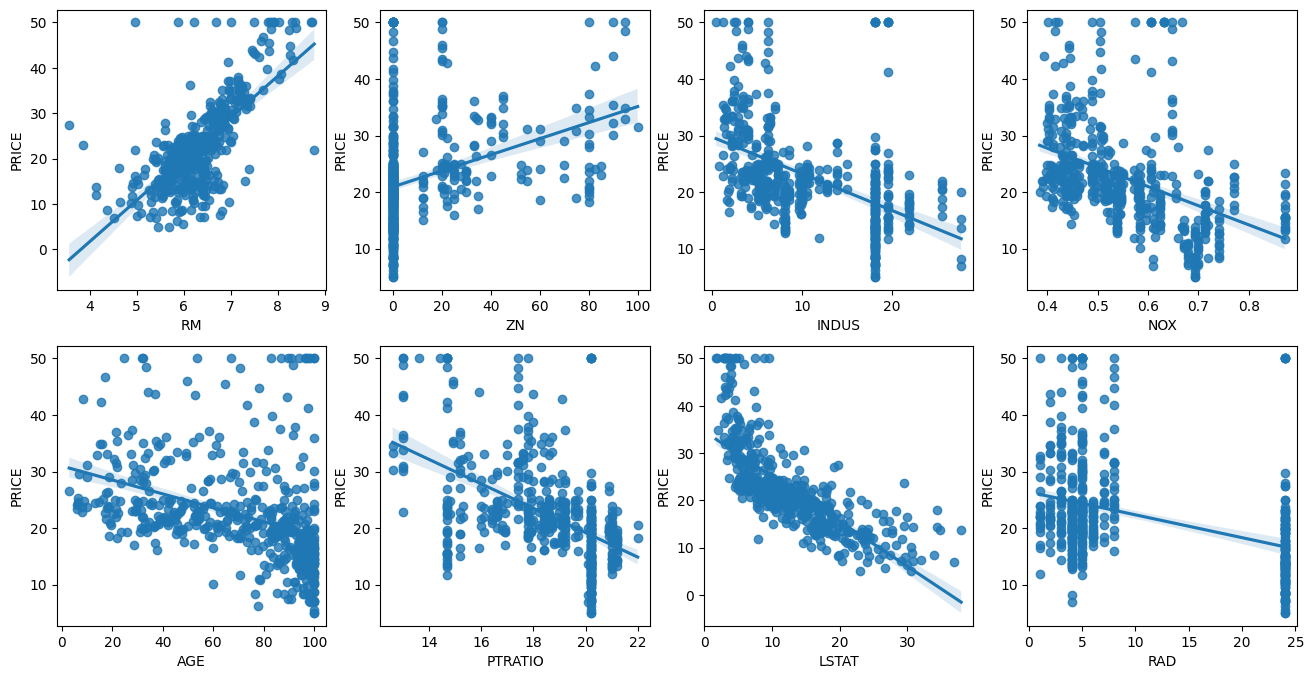

In [15]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM','ZN', 'INDUS','NOX', 'AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row = int(i / 4)
  col = i % 4
  
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])


=> 다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다.
- RM(방 개수)은 양 방향의 선형성(Positive Linearity)이 가장 큼.
- LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 큼.

- 보스턴 주택 가격의 회귀 모델 만들기

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE :{1:.3F}'.format(mse,rmse))
print('Varance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 17.297, RMSE :4.159
Varance score : 0.757


- 주택가격 모델의 intercept(절편), coefficients(회귀 계수) 값

In [19]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


- coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력- 판다스 Series의 sort_values() 함수 이용

In [20]:
# 회귀계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

=> RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수의 - 값이 매우 커 보인다. 

=> 차츰 최적화를 수행하면서 피처 coefficients의 변화도 같이 살펴보겠다.

- 교차 검증으로 MSE/RMSE 측정

In [23]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring= 'neg_mean_squared_error', cv= 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring= 'neg_mean_squared_error')로 변환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))


5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


=> 5개 폴드 세트에서 교차 검증을 수행한 결과, 평균 RMSE는 약 5.829가 나왔다. (교재: 약 5.836). 

=> cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값을 확인해 보면 모두 음수임을 알 수 있다.

